# Основы визуализации данных с помощью Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык визуализации данных с помощью простых графиков matplotlib. Научиться использовать визуализацию данных для проверки гипотез и валидации данных.

### Описание домашнего задания и формат сдачи

Вам предстоит выполнить задачи по визуализации данных. Для этого  впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку преподавателю.

**Важно учесть:** У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` – порядковый номер записи в датасете
* `Name` – наименование игры
* `Platform` – платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` – год выпуска игры
* `Genre` – жанр игры
* `Publisher` – наименование компании-издателя игры
* `NA_Sales` – объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` – объем продаж игры в Европе, млн. копий
* `JP_Sales` – объем продаж игры в Японии, млн. копий
* `Other_Sales` – объем продаж игры в остальных странах, млн. копий
* `Global_Sales` – объем продаж игры по всему миру, млн. копий

### Критерии оценки

**Зачет** – выполнены задачи 1-9, каждый график отформатирован и читаем

**На доработку** – выполнены не все обязательные задачи или какой-либо из графиков не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, необходимые для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки.

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

### Загрузка данных

In [143]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте гистограмму распределения объема продаж всех игр в Японии.

Text(0, 0.5, 'Количество')

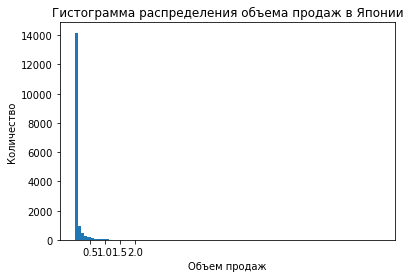

In [174]:
jp_sales = df['JP_Sales']
#jp_sales.head()
#jp_sales.shape
plt.hist(jp_sales, bins = 100)

plt.title('Гистограмма распределения объема продаж в Японии')
plt.xlabel('Объем продаж')
x_range = [i/2 for i in range(1, 5)]
plt.xticks(x_range)
plt.ylabel('Количество')

#почему ось икс не увеличивается (не сдвигается вправо) при изменении значения bins?

### Задача 2

Постройте столбчатую диаграмму (barchart), показывающую сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах.

Text(0, 0.5, 'Объем продаж $')

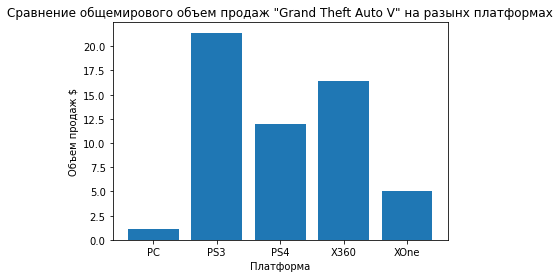

In [65]:
gta = df[df['Name'] == 'Grand Theft Auto V'].groupby('Platform').agg({'Global_Sales' : 'sum'}).reset_index()
#gta.head()

plt.bar(gta['Platform'], gta['Global_Sales'])
plt.title('Сравнение общемирового объем продаж "Grand Theft Auto V" на разынх платформах')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж $')

### Задача 3

Постройте линейный график динамики суммарных общемировых продаж всех игр по годам.

Text(0, 0.5, 'Объем продаж $')

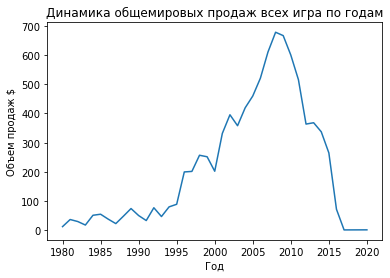

In [70]:
year_din = df.loc[:, ['Year', 'Global_Sales']].groupby('Year').agg({'Global_Sales' : 'sum'})
#year_din.head
plt.plot(year_din)
plt.title('Динамика общемировых продаж всех игра по годам')
plt.xlabel('Год')
plt.ylabel('Объем продаж $')

### Задача 4

Постройте точечную диаграмму, показывающую существование зависимости продаж во всем мире от продаж в Северной Америке.

Text(0, 0.5, 'Продажи в Северной Америке')

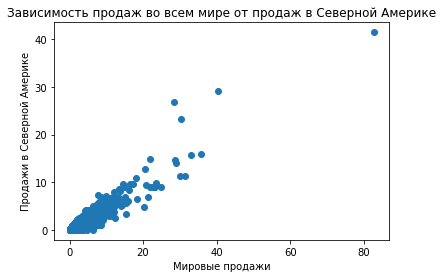

In [72]:
plt.scatter(df['Global_Sales'], df['NA_Sales'])
plt.title('Зависимость продаж во всем мире от продаж в Северной Америке')
plt.xlabel('Мировые продажи')
plt.ylabel('Продажи в Северной Америке')

### Задача 5

Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой.

Text(0.5, 1.0, 'Процентное соотношение игры "Super Mario Bros." на разных платформах')

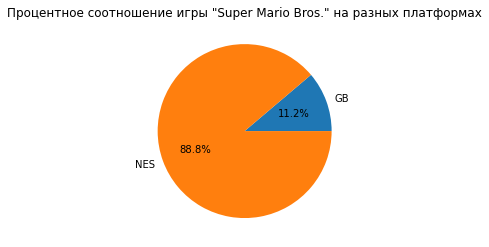

In [185]:
sm = df[df['Name'] == 'Super Mario Bros.'].groupby('Platform').agg({'Global_Sales' : 'sum'})
#sm
#sm.shape
plt.pie(sm['Global_Sales'], labels = sm.index, autopct = '%1.1f%%')
plt.title('Процентное соотношение игры "Super Mario Bros." на разных платформах')


### Задача 6

Определите 5 издателей, имеющих наибольшие суммарные продажи во всём мире в 2013 году, и проиллюстрируйте величину их продаж на столбчатой диаграмме.

Text(0, 0.5, 'Объем продаж')

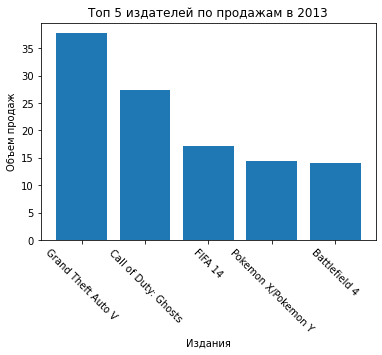

In [96]:
first_5 = df[df['Year'] == 2013].groupby('Name').agg({'Global_Sales' : 'sum'}).sort_values('Global_Sales', ascending=False).head(5).reset_index()
plt.bar(first_5['Name'], first_5['Global_Sales'])
plt.title('Топ 5 издателей по продажам в 2013')
plt.xticks(rotation = -45)
plt.xlabel('Издания')
plt.ylabel('Объем продаж')

### Задача 7

Постройте гистограмму распределения величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно. Гистограмма для большей точности должна содержать 20 столбцов, отсечки на оси X должны соответствовать границам столбцов.

Text(0, 0.5, 'Объем продаж')

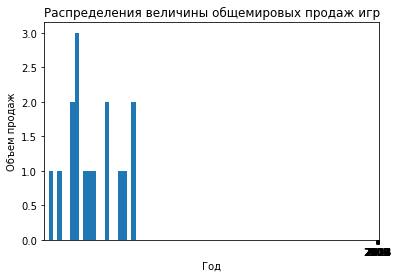

In [195]:
nonint = df[(df['Name'] != 'Nintendo') & (2000 <= df['Year']) & (df['Year'] <= 2015)].groupby('Year').agg({'Global_Sales' : 'sum'}).reset_index()
nonint
plt.hist(nonint['Global_Sales'], bins = 20)
plt.title('Распределения величины общемировых продаж игр')
plt.xlabel('Год')
x_range = [i for i in range(int(nonint['Year'].min()), int(nonint['Year'].max()) + 1)]
plt.xticks(x_range)
plt.ylabel('Объем продаж')

#гистограмма не получилась -_-

### Задача 8

Постройте линейный график динамики суммарных мировых продаж игр жанра "Action" по годам.

Text(0, 0.5, 'Объем продаж')

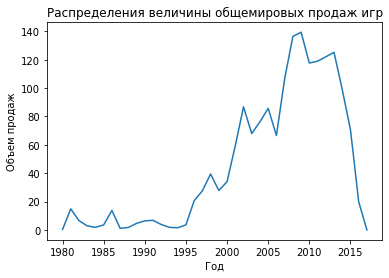

In [118]:
act = df[df['Genre'] == 'Action'].groupby('Year').agg({'Global_Sales' : 'sum'})
act.head()
plt.plot(act)
plt.title('Динамика суммарных мировых продаж игр жанра "Action" по годам')
plt.xlabel('Год')
plt.ylabel('Объем продаж')

### Задача 9

С помощью столбчатой диаграммы проиллюстрируйте объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра. Столбцы расположите по убыванию.

Text(0, 0.5, 'Объем продаж')

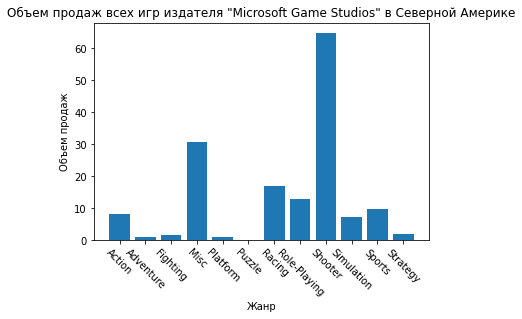

In [127]:
mgs = df[df['Publisher'] == 'Microsoft Game Studios'].groupby('Genre').agg({'NA_Sales' : 'sum'}).reset_index()
plt.bar(mgs['Genre'], mgs['NA_Sales'])
plt.title('Oбъем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке')
plt.xlabel('Жанр')
plt.xticks(rotation = -45)
plt.ylabel('Объем продаж')

## Дополнительные (необязательные) задачи

### Задача 10

Одной из основных задач при анализе данных является проверка данных на корректность и отсутствие ошибок. В датасете "vgsales" одним из потенциальных источников ошибок является столбец с общемировыми продажами. По идее, значение общемировых продаж какой-либо игры должно равняться сумме продаж в Северной Америке, Европе, Японии и остальных странах, в противном случае мы получим ошибку в данных, которая может негативно повлиять на весь дальнейший процесс анализа.

Причин возникновения такой ошибки может быть несколько. Давайте рассмотрим следующие причины:
1. Ошибка округления. В целом, такая ошибка достаточно часто встречается при переводе величин из одних единиц в другие (например, из тысяч копий в миллионы копий).
1. Ошибка вычислений. Такая ситуация требует более серьезного исследования, поскольку она может привести к недостоверным результатам анализа данных.

Будем считать, что в записи имеется ошибка суммирования, если сумма продаж какой-либо игры в Северной Америке, Европе, Японии и остальных странах отличается от общемировых продаж более, чем на 0.01 млн копий.

С помощью круговой диаграммы проиллюстрируйте процент записей в датасете, имеющих такую ошибку суммирования продаж.

In [ ]:
### YOUR CODE HERE ###
